In [1]:
import random

import networkx as nx
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder




In [3]:
df = pd.read_csv("BuildingModels/facebook_combined.txt", sep=' ')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'BuildingModels/facebook_combined.txt'

In [4]:
G = nx.from_pandas_edgelist(df, "0", "1")

KeyError: '0'

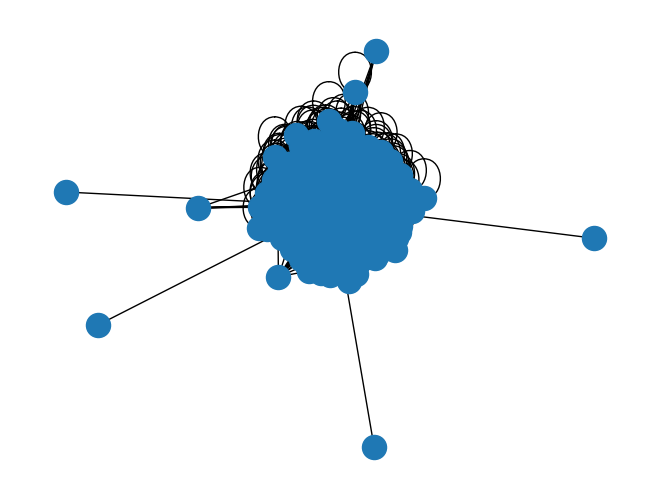

In [4]:
nx.draw(G)

In [5]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.betweenness_centrality(G)

In [6]:
len(degree_centrality)

492

In [7]:
data = pd.DataFrame({"degree":[], "closeness":[], "betwennes":[], "influence":[]})

In [8]:
for d, c, b in zip(list(degree_centrality.values()),list(closeness_centrality.values()),list(betweeness_centrality.values())):
    included = [d,c,b, (d+c+b)/3]
    data.loc[len(data)] = included

In [9]:
avg_influence = data['influence'].mean()
data.loc[data['influence'] >=2*avg_influence , 'influence'] = 1
data.loc[data['influence'] <2*avg_influence , 'influence'] = 0

In [9]:
data.to_csv("Data.csv")

In [10]:
data.head()

,degree,closeness,betwennes,influence
0,0.205703,0.556059,0.000129,0.253963
1,0.236253,0.566975,0.000164,0.267797
2,0.236253,0.565668,0.000168,0.267363
3,0.574338,0.699430,0.002255,0.425341
4,0.549898,0.687675,0.002302,0.413292


In [11]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [12]:
def Scaling(X):
    scaler = StandardScaler()
    X=scaler.fit_transform(X)
    return X

In [13]:
X = Scaling(X)

In [14]:
over= RandomOverSampler()
X,Y= over.fit_resample(X,Y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [141]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss=tf.keras.losses.BinaryCrossentropy(),
                            metrics=['accuracy'])

In [18]:
model.evaluate(X_train,y_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5144 - loss: 0.6812


[0.6825947165489197, 0.4902777671813965]

In [19]:
model.fit(X_train, y_train, batch_size=16, epochs=200,)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7080 - loss: 0.6426
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.4970
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9520 - loss: 0.3828
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.2870
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.2169
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.1749
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.1158
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0980
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0836
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0641
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0595
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [20]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0122 


[0.01737295463681221, 0.9958333373069763]

In [21]:
X

array([[-0.65261575, -0.59013755, -0.40266846],
       [-0.51681515, -0.48985645, -0.39070992],
       [-0.51681515, -0.50185811, -0.38965137],
       ...,
       [ 2.82387974,  3.34100454,  4.25395666],
       [ 2.75145275,  3.19836818,  3.41818844],
       [ 2.79671962,  3.28698315,  3.40603042]])

In [22]:
X

array([[-0.65261575, -0.59013755, -0.40266846],
       [-0.51681515, -0.48985645, -0.39070992],
       [-0.51681515, -0.50185811, -0.38965137],
       ...,
       [ 2.82387974,  3.34100454,  4.25395666],
       [ 2.75145275,  3.19836818,  3.41818844],
       [ 2.79671962,  3.28698315,  3.40603042]])

In [23]:
len(Y[Y==0])

480

In [24]:
for i in Y:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [25]:
df = pd.read_csv("econ-beause.mtx", sep=' ')
df.head()

,Source,Target,weight
0,6,1,34.099991
1,7,1,1843.599900
2,19,1,191.599990
3,25,1,0.500000
4,63,1,51.699997


In [42]:
dt = pd.read_csv("soc-dolphins.mtx", sep=' ', names= ['Source', "Target"])

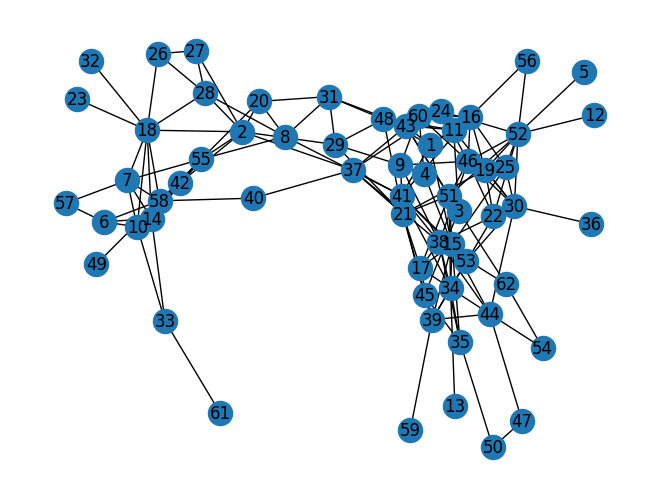

In [43]:
Gt = nx.from_pandas_edgelist(dt, "Source", "Target")
nx.draw(Gt, with_labels=True)

In [37]:
degree_centrality_t = nx.degree_centrality(Gt)
closeness_centrality_t = nx.closeness_centrality(Gt)
betweeness_centrality_t = nx.betweenness_centrality(Gt)

In [38]:
nodes = Gt.nodes()
nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [30]:
print(degree_centrality_t[11])
# print(len(closeness_centrality_t))

0.0819672131147541


In [39]:
data_t = pd.DataFrame({"Node":[],"degree":[], "closeness":[], "betwennes":[], "influence":[]})

In [40]:
for n, d, c, b in zip(nodes,list(degree_centrality_t.values()),list(closeness_centrality_t.values()),list(betweeness_centrality_t.values())):
    included = [n,d,c,b, 0]
    data_t.loc[len(data_t)] = included

In [33]:
avg_influence = data_t['influence'].mean()
data_t.loc[data_t['influence'] >=2*avg_influence , 'influence'] = 1
data_t.loc[data_t['influence'] <2*avg_influence , 'influence'] = 0

In [41]:
data_t.to_csv("Data/Facebook.csv" , index=False)

In [16]:
X = data_t.iloc[:, :-1].values
Y = data_t.iloc[:, -1].values

In [36]:
X = Scaling(X)

In [37]:
over= RandomOverSampler()
X,Y= over.fit_resample(X,Y)

In [38]:
Y[Y==1]

array([1., 1., 1., ..., 1., 1., 1.])

In [39]:
Y[Y==0]

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
data_t.head()

,degree,closeness,betwennes,influence
0,0.013599,0.420360,0.000375,0.0
1,0.000186,0.295970,0.000000,0.0
2,0.413376,0.619361,0.018321,1.0
3,0.435358,0.629899,0.020473,1.0
4,0.178651,0.506224,0.003627,0.0


In [41]:
model.evaluate(X,Y)

333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.2514


[0.6780983805656433, 0.9192184805870056]

In [42]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0122 


[0.01737295463681221, 0.9958333373069763]

In [43]:
len(degree_centrality_t)

5369

In [5]:
data_t.to_csv("Data_t.csv")

NameError: name 'data_t' is not defined

In [45]:
Y[Y==1]

array([1., 1., 1., ..., 1., 1., 1.])

TypeError: iteration over a 0-d array

In [4]:
data = pd.read_csv("Data_t.csv")
data.head()

NameError: name 'pd' is not defined

In [44]:
data.iloc[85]

degree       0.995927
closeness    0.995943
betwennes    0.031017
influence    1.000000
Name: 85, dtype: float64

In [143]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [17]:
len(y)

492

In [144]:
X = Scaling(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)

In [174]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss=['mean_squared_error'],
                            metrics=['mse', 'mae', 'mape'])

In [175]:
model.build((None, 3))

In [176]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 9)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [177]:
model.evaluate(X_train, y_train)

126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0543 - mae: 0.2126 - mape: 204619312.0000 - mse: 0.0543


[0.0560811385512352, 0.0560811385512352, 0.21435600519180298, 205129952.0]

In [117]:
len(y_train)

4026

In [178]:
model.fit(X_train, y_train, epochs = 10000, batch_size = 800)

Epoch 1/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0516 - mae: 0.2032 - mape: 193420512.0000 - mse: 0.0516
Epoch 2/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297 - mae: 0.1471 - mape: 139247168.0000 - mse: 0.0297 
Epoch 3/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 - mae: 0.1027 - mape: 95781008.0000 - mse: 0.0176  
Epoch 4/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - mae: 0.0721 - mape: 64623868.0000 - mse: 0.0120 
Epoch 5/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - mae: 0.0518 - mape: 44137308.0000 - mse: 0.0098 
Epoch 6/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mae: 0.0389 - mape: 31375034.0000 - mse: 0.0089 
Epoch 7/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0071 - mae: 0.0304 - mape: 24132542.0000 - mse: 0.0071 
Epoch 8/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - mae: 0.0296 - mape: 21735456.0000 - mse: 0.0086  
Epoch 9/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [179]:
model.evaluate(X_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1436e-04 - mae: 0.0011 - mape: 484789.8750 - mse: 2.1436e-04


[0.00019942417566198856,
 0.00019942417566198856,
 0.0010733597446233034,
 489345.09375]

In [180]:
d_t = pd.read_csv("Data.csv")
#d_t = d_t.drop("Unnamed: 0", axis=1)
d_t.head()

,degree,closeness,betwennes,influence
0,0.205703,0.556059,0.000129,0.048812
1,0.236253,0.566975,0.000164,0.055971
2,0.236253,0.565668,0.000168,0.055948
3,0.574338,0.699430,0.002255,0.149786
4,0.549898,0.687675,0.002302,0.145963


In [181]:
X_t = d_t.iloc[:,:-1].values

In [170]:
X_t

array([[2.05702648e-01, 5.56058890e-01, 1.28748547e-04],
       [2.36252546e-01, 5.66974596e-01, 1.64374798e-04],
       [2.36252546e-01, 5.65668203e-01, 1.67528384e-04],
       ...,
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00]])

In [182]:
X_t = Scaling(X_t)

In [183]:
y_pred = model.predict(X_t)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [184]:
print(max(y_pred))

[0.01811475]


In [185]:
from Topsis import Topsis
degree = d_t['degree'].values
closeness = d_t['closeness'].values
betwennes = d_t['betwennes'].values
evaluation_matrix = np.array([0,0,0])
for d, c, b in zip(degree, closeness, betwennes):
    included = [d, c, b]
    included = np.array(included)
    evaluation_matrix = np.vstack((evaluation_matrix, included))
evaluation_matrix = evaluation_matrix[1:]
evaluation_matrix

array([[2.05702648e-01, 5.56058890e-01, 1.28748547e-04],
       [2.36252546e-01, 5.66974596e-01, 1.64374798e-04],
       [2.36252546e-01, 5.65668203e-01, 1.67528384e-04],
       ...,
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00],
       [2.03665988e-03, 4.99491353e-01, 0.00000000e+00]])

In [186]:
weights = [1, 1, 1]

'''
    if higher value is preferred - True
    if lower value is preferred - False
    '''
criterias = np.array([True, True, True])
t = Topsis(evaluation_matrix, weights, criterias)

best = t.calc()
model.evaluate(X_t, best)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mae: 0.1328 - mape: 28395.8145 - mse: 0.0344


[0.019983947277069092, 0.019983947277069092, 0.0967240035533905, 240636.453125]

In [187]:
print(max(best))

1.0


In [188]:
max(y_pred)

array([0.01811475], dtype=float32)

In [189]:
best[85]

1.0

In [190]:
y_pred[85]

array([-0.22406073], dtype=float32)

In [46]:
G = nx.read_gml("football.gml")

In [44]:
pwd

'c:\\Users\\bella\\Desktop\\PFE\\BuildingModels'

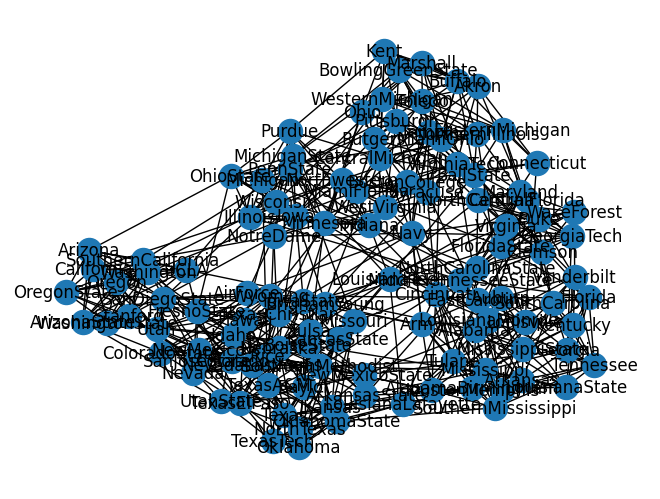

In [47]:
nx.draw(G, with_labels=True)

In [48]:
degree_centrality_t = nx.degree_centrality(G)
closeness_centrality_t = nx.closeness_centrality(G)
betweeness_centrality_t = nx.betweenness_centrality(G)

In [49]:
degree_centrality_t

{'BrighamYoung': 0.10526315789473684,
 'FloridaState': 0.10526315789473684,
 'Iowa': 0.10526315789473684,
 'KansasState': 0.10526315789473684,
 'NewMexico': 0.09649122807017543,
 'TexasTech': 0.10526315789473684,
 'PennState': 0.10526315789473684,
 'SouthernCalifornia': 0.10526315789473684,
 'ArizonaState': 0.09649122807017543,
 'SanDiegoState': 0.09649122807017543,
 'Baylor': 0.08771929824561403,
 'NorthTexas': 0.08771929824561403,
 'NorthernIllinois': 0.08771929824561403,
 'Northwestern': 0.09649122807017543,
 'WesternMichigan': 0.08771929824561403,
 'Wisconsin': 0.10526315789473684,
 'Wyoming': 0.09649122807017543,
 'Auburn': 0.09649122807017543,
 'Akron': 0.09649122807017543,
 'VirginiaTech': 0.09649122807017543,
 'Alabama': 0.09649122807017543,
 'UCLA': 0.09649122807017543,
 'Arizona': 0.09649122807017543,
 'Utah': 0.09649122807017543,
 'ArkansasState': 0.08771929824561403,
 'NorthCarolinaState': 0.09649122807017543,
 'BallState': 0.08771929824561403,
 'Florida': 0.096491228070175

In [55]:
nodes = G.nodes()
for n, d, c, b in zip(nodes,list(degree_centrality_t.values()),list(closeness_centrality_t.values()),list(betweeness_centrality_t.values())):
    print(n)
    included = [n,d,c,b, 0]
    print(included)
    data_t.loc[len(data_t)] = included

BrighamYoung
FloridaState
Iowa
KansasState
NewMexico
TexasTech
PennState
SouthernCalifornia
ArizonaState
SanDiegoState
Baylor
NorthTexas
NorthernIllinois
Northwestern
WesternMichigan
Wisconsin
Wyoming
Auburn
Akron
VirginiaTech
Alabama
UCLA
Arizona
Utah
ArkansasState
NorthCarolinaState
BallState
Florida
BoiseState
BostonCollege
WestVirginia
BowlingGreenState
Michigan
Virginia
Buffalo
Syracuse
CentralFlorida
GeorgiaTech
CentralMichigan
Purdue
Colorado
ColoradoState
Connecticut
EasternMichigan
EastCarolina
Duke
FresnoState
OhioState
Houston
Rice
Idaho
Washington
Kansas
SouthernMethodist
Kent
Pittsburgh
Kentucky
Louisville
LouisianaTech
LouisianaMonroe
Minnesota
MiamiOhio
Vanderbilt
MiddleTennesseeState
Illinois
MississippiState
Memphis
Nevada
Oregon
NewMexicoState
SouthCarolina
Ohio
IowaState
SanJoseState
Nebraska
SouthernMississippi
Tennessee
Stanford
WashingtonState
Temple
Navy
TexasA&M
NotreDame
TexasElPaso
Oklahoma
Toledo
Tulane
Mississippi
Tulsa
NorthCarolina
UtahState
Army
Cincinnat

In [56]:
data_t.head()

,Node,degree,closeness,betwennes,influence
0,0.0,0.085934,0.353343,1.463059e-01,0.0
1,1.0,0.004210,0.261376,2.783274e-06,0.0
2,2.0,0.002476,0.261258,7.595021e-08,0.0
3,3.0,0.004210,0.261376,1.685066e-06,0.0
4,4.0,0.002476,0.261258,1.840332e-07,0.0


In [58]:
G.nodes()

NodeView(('BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCa